# **Python Audio Processing Basics**

### Table of Contents:
**1. Audio Processing Basics**  
- 1.1 Audio formats  
- 1.2 Signal parameters

**2. Wave Module**  
- 2.1 Load in audio
- 2.2 Get signal parameters
- 2.3 Change parameters of audio file
- 2.3 Plot Amplitude using `Matplotlib`

## 1. Audio Processing Basics

**Audio Formats**

`mp3` - lossy compression, compresses data to small size but with loss of data.  
`flac` - lossless compression, allows the original data to be perfectly reconstructed from the compressed data.    
`wav` - uncompressed, large files sizes.

**Signal Parameters**

`Number of channels`= Number of independent audio channels (1 = mono, 2 = stereo)  
`Sample Width`= Number of bytes per sample  
`Sample Frequency (Sample rate/framerate)`= Number of samples per second (44,100 Hz)  
`Number of Frames`= Total number of frames  
`Values of a Frame`= Binary format with integer values

## 2. `Wave` Module

**Load in audio**

In [1]:
import wave

# Load in audio in 'Read Only' mode to analyze it.
wav_obj = wave.open('Calvin Harris - Feel So Close.wav', 'rb')

**Get signal parameters**

In [2]:
# Get Parameters.
n_channels = wav_obj.getnchannels()
sample_width = wav_obj.getsampwidth()
sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()

print('Number of Channels:', n_channels)
print('Sample Width:', sample_width)
print('Sample Frequency:', sample_freq, 'Hz')
print('Number of Samples:', n_samples)

Number of Channels: 2
Sample Width: 2
Sample Frequency: 44100 Hz
Number of Samples: 9621110


In [3]:
# Show all parameters..
wav_obj.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=9621110, comptype='NONE', compname='not compressed')

### Change Parameters of Audio File

**Open audio file in Write Only mode**

In [4]:
# Create a new wav object using 'Write Only' mode - allows us to SET parameters.
wav_obj_new = wave.open('Calvin Harris - Feel So Close_edit.wav', 'wb')

**Set new signal parameters**

In [5]:
# Convert to mono.
wav_obj_new.setnchannels(1)

# Set sample width to 2.
wav_obj_new.setsampwidth(2)

# Set framerate to 16000.
wav_obj_new.setframerate(16000.0)

**Write frames to audio file**

In [6]:
# Read and return (n) frames of audio.
frames = wav_obj.readframes(n_samples)

# Create audio file with newly set parameters.
wav_obj_new.writeframes(frames)

In [7]:
# Close wav objects.
wav_obj_new.close()
wav_obj.close()

**Check parameters of new audio file**

In [8]:
wav_obj = wave.open('Calvin Harris - Feel So Close_edit.wav', 'rb')

# Show all parameters..
wav_obj.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=19242220, comptype='NONE', compname='not compressed')

In [9]:
wav_obj.close()

## **Plotting Signal Amplitude using Matplotlib**

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Open wav file.
wav_obj = wave.open('Calvin Harris - Feel So Close.wav', 'rb')

# Print Sample Frequency and Number of Samples.
sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()
sample_width = wav_obj.getsampwidth()

print('Number of Samples:', n_samples)
print('Sample Frequency:', sample_freq)
print('Sample Width:', sample_width)

Number of Samples: 9621110
Sample Frequency: 44100
Sample Width: 2


**Calculating Audio Length (X-Axis)**

In [11]:
# Calculate length of audio in sec.
t_audio = n_samples / sample_freq

# Create n values (from 0 - 3.78 sec).
times = np.linspace(0, t_audio, num=n_samples)

# Print length of audio (s).
print('Audio length:', t_audio, '(s)')
print('Number of samples in x-axis:', len(times))

Audio length: 218.16575963718822 (s)
Number of samples in x-axis: 9621110


**Converting Audio into Amplitude values (Y-Axis)**

In [12]:
# Get amplitude values of signal over time.
signal_wave = wav_obj.readframes(n_samples) # returns a bytes object

# Convert to np array to serve as y values in plot.
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

In [13]:
len(signal_array) / sample_width

9621110.0

**Split data into individual channels using array slicing**

In [14]:
# Split channels if Stereo.
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

In [15]:
len(l_channel)

9621110

**Plot Waveform**

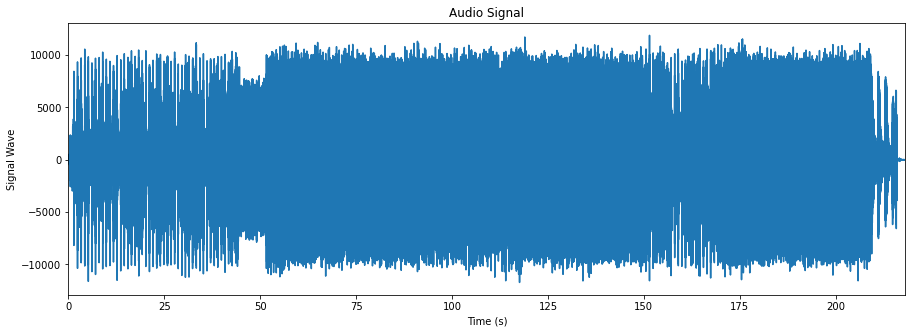

In [16]:
plt.figure(figsize=(15,5))
plt.plot(times, r_channel)
plt.title('Audio Signal')
plt.ylabel('Signal Wave')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)

plt.show()

In [17]:
# Close object.
wav_obj.close()